In [4]:
import healpy as hp
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf_proto as maf
from rubin_scheduler.scheduler.utils import HpInLsstFov

In [2]:
con = sqlite3.connect("baseline_v5.1.0_10yrs.db")
df = pd.read_sql("select * from observations where night=10;", con)
con.close
data_array =  df.to_records(index=False)

In [16]:
nside = 256
cam = HpInLsstFov(nside=nside)

area_over = []
slicer = maf.Slicer(nside=nside)
metric = maf.CountMetric()
for i in range(0, data_array.size-1):
    #print(i)
    #hp_array = slicer(data_array[i-1:i+1], metric)
    #overlap = np.where(hp_array > 1)[0]
    #area_over.append(overlap.size)
    indx1 = cam(np.radians(data_array["fieldRA"][i]), np.radians(data_array["fieldDec"][i]))
    indx2 = cam(np.radians(data_array["fieldRA"][i+1]), np.radians(data_array["fieldDec"][i+1]))
    inter = np.intersect1d(indx1, indx2)
    area_over.append(inter.size)

In [17]:
area_over = np.array(area_over) * hp.nside2pixarea(nside, degrees=True)

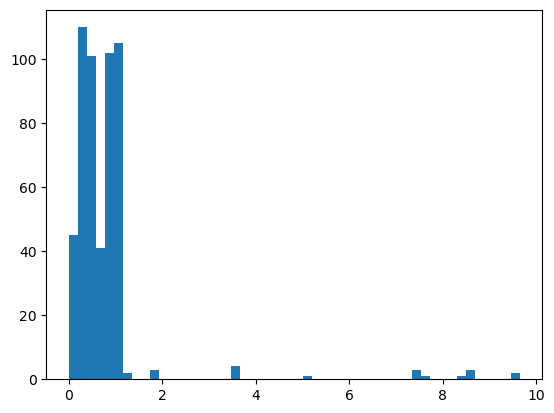

In [19]:
_tmp = plt.hist(area_over, bins=50)

In [24]:
ack = np.where((area_over > 0) & (area_over < 1.5))
np.median(area_over[ack])

np.float64(0.6819260867340731)

Text(0, 0.5, 'N in night')

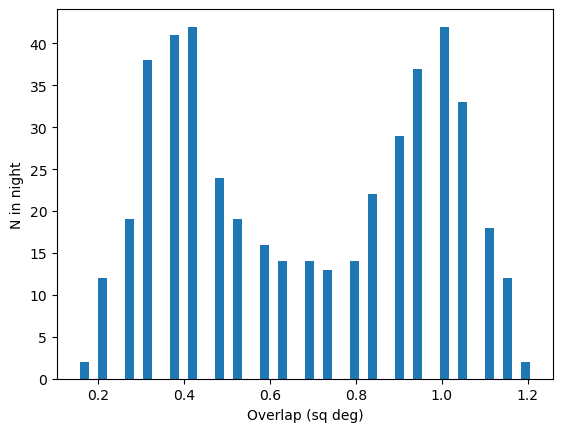

In [26]:
_tmp = plt.hist(area_over[ack], bins=50)
plt.xlabel("Overlap (sq deg)")
plt.ylabel("N in night")